In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns = 200

In [261]:
dating = pd.read_csv('May_2013_Online_Dating_CSV.csv')

In [262]:
dating

,psraid,sample,lang,state,fips,cregion,usr,llitext,form,sex,q1,intuse,emlocc,eminuse,intmob,home3nw,q2,modem4b,q3,q4,q5,q6,q7,q9,act21,act87,act93,act112,act130,look1,look2,loc1a,loc1b,q10a,q10b,cellphn,smart1,smart2,q11a,q11b,q11c,q11d,q11e,q11f,q12,loc2a,loc2b,loc3m1,loc3m2,loc3m3,loc3m4,loc3m5,loc3m6,loc3m7,loc3m8,loc3m9,loc3m10,loc3m11,loc3m12,loc3m13,mar,mar2,mar3,mar4,meet,rel1,rel2,rel3,intdatea,intdateb,intdatec,intdated,intdatee,snsdate1a,snsdate1b,snsdate1c,snsdate1d,snsdate1e,snsdate2a,snsdate2b,snsdate2c,celldatea,celldateb,breaka,breakb,date1a,date1bm1,date1bm2,date1bm3,date1bm4,date1bm5,date1bm6,date1bm7,date1bm8,date1bm9,date1bm10,date1bm11,date1bm12,date1bm13,date1bm14,date1bm15,date1bm16,date1bm17,date2a,date2bm1,date2bm2,date2bm3,date2bm4,date2bm5,date2bm6,date2bm7,date2bm8,date2bm9,date2bm10,date2bm11,date2bm12,date2bm13,date2bm14,date2bm15,date2bm16,date3a,date3b,date4a,date4b,date4c,date5a,date5b,date5c,date5d,date5e,date5f,date6,date7,date8a,date8b,date8c,date8d,date8e,date9a,date9b,date9c,date9d,rel4a,rel4b,rel4c,rel5,rel6,rel7,rel8a,rel8b,rel8c,rel8d,rel8e,rel8f,q13a,q13b,q13c,age,par,qd2b1,qd2b2,qd2c,hh1,educ2,emplnw,hisp,birth_hisp,race,inc,lgbt,ql1a,ql2hh,qc1,qc2hh,q2os,modem4bos,q6os,smart2os,loc3os,rel3vb,date1bos,date2bos,raceos,weight,standwt
0,100006,1,1,5,5109,3,R,2,1,2,2,1,1,,2,1,,98,,,,,,,2,2,2,2,2,2,2,,,1,1,1,2,7,2,2,2,2,2,2,,2,2,,,,,,,,,,,,,,1,,57,,,2,,,2,2,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,,,,,,,,,,,,,,,,,1,1,2,2,2,,1,1,3,,2,2,2,,2,2,2,2,2,77,2,,,,2,8,3,2,,1,5,1,,3,,,,,,,,,,,,1.258065,0.397268
1,100017,1,1,17,17031,2,S,2,1,2,2,1,1,,1,1,,4,,,,,,,1,1,2,2,2,1,2,2,,1,2,1,1,1,1,1,1,2,1,1,2,2,1,,,,,,,,,,,,,,1,,15,,,2,,,2,2,,,,2,1,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,1,2,,,,,,,,,,,,,,,,,2,1,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2,2,2,38,1,0,1,1,2,6,2,2,,1,9,1,,2,,,,,,,,,,,,2.354839,0.743604
2,100025,1,1,34,34039,1,S,2,2,1,3,,,1,1,1,,5,,,,,,,1,2,2,2,2,1,2,,,1,2,1,1,3,1,1,1,2,1,1,1,2,1,,,,,,,,,,,,,,1,,15,,,2,,,1,2,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,1,1,,,,,,,,,,,,,,,,,1,2,2,1,1,,2,1,1,1,2,2,1,2,2,2,2,2,2,51,1,1,2,0,2,4,1,2,,4,8,1,,1,,,,,,,,,,,,6.870968,2.169695
3,100027,1,1,26,26045,2,S,1,2,1,5,,,2,2,,,,2,2,2,8,9,2,,,,,,,,,,1,2,1,2,99,2,2,2,2,2,2,,2,8,,,,,,,,,,,,,,5,2,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,,,,,,,,,,,,,,,,,9,9,8,2,,,,,,,,,,,,,2,2,2,88,2,,,,1,4,3,2,,1,2,9,,3,,,,,,,,,,,,1.419355,0.448200
4,100028,1,1,45,45091,3,U,2,2,2,3,,,1,2,1,,3,,,,,,,1,1,2,2,2,1,2,,2,1,2,1,2,7,2,2,2,2,2,1,,2,2,,,,,,,,,,,,,,1,,18,,,2,,,2,2,,,,2,2,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,,,,,,,,,,,,,,,,,2,2,1,2,1,2,2,1,3,,2,2,2,2,2,2,2,2,2,62,2,,,,2,6,3,2,,1,99,1,,2,,,,,,,,,,,,1.419355,0.448200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,204954,2,1,27,27037,2,S,,1,1,1,1,1,,1,1,,5,,,,,,,1,1,2,2,2,1,2,2,,,2,1,1,3,1,1,1,2,1,1,3,2,2,,,,,,,,,,,,,,6,2,,2,,,,,2,2,,,,2,2,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,2,2,,,,,,,,,,,,,,,,,1,1,2,2,,,,,,,,,,,,,2,2,2,24,2,,,,2,5,7,2,,1,5,1,,,1,1,,,,,,,,,,3.483871,1.100127
2248,204960,2,1,39,39059,2,R,,1,1,4,1,2,,2,1,,3,,,,,,,2,1,2,2,2,2,2,2,,,2,1,2,8,2,2,2,2,2,2,,2,2,,,,,,,,,,,,,,5,2,,8,,,,,2,2,,,,2,2,,,,1,1,2,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,2,,,,,,,,,,,,,,,,,1,1,8,2,,,,,,,,,,,,,2,2,2,49,1,0,0,2,1,3

In [263]:
dating.shape

(2252, 185)

### Internet and Email Usage

In [264]:
#Form 1
dating['intuse'].value_counts()

     1122
1     936
2     190
8       2
9       2
Name: intuse, dtype: int64

In [265]:
# Form 1
dating['emlocc'].value_counts()

     1122
1     868
2     262
Name: emlocc, dtype: int64

In [266]:
# Form 2
dating['eminuse'].value_counts()

     1130
1     902
2     219
8       1
Name: eminuse, dtype: int64

In [267]:
# Form 1 & 2
dating['intmob'].value_counts()

1    1339
2     911
8       2
Name: intmob, dtype: int64

In [268]:
dating['intmob'].isnull().sum()

0

In [269]:
# Relationship Status

dating['mar'].value_counts()



1    1093
6     445
3     259
5     240
2     119
4      62
9      34
Name: mar, dtype: int64

In [270]:
# if mar = 3-9
dating['mar2'].value_counts()

     1212
2     781
1     216
9      36
8       7
Name: mar2, dtype: int64

In [271]:
# if mar= 1,2 or mar2=1
# potential target mar3
married = dating[dating['mar']== 1]
live_partner = dating[dating['mar']== 2]
committed = dating[dating['mar2']== '1']

In [272]:
married['mar3'].value_counts()

20    44
25    39
15    36
30    36
10    35
      ..
61     2
97     1
67     1
66     1
86     1
Name: mar3, Length: 70, dtype: int64

In [273]:
live_partner['mar3'].value_counts()

3     12
2     11
5     10
1      9
6      9
12     8
20     7
10     6
7      6
4      6
9      4
8      4
15     4
14     4
0      4
17     3
30     3
40     2
23     2
22     1
99     1
13     1
25     1
16     1
Name: mar3, dtype: int64

In [274]:
committed['mar3'].value_counts()

1     50
0     32
2     25
3     22
5     16
4     11
6     10
7      7
12     6
8      5
13     4
99     4
10     4
25     3
20     3
15     3
60     2
26     2
14     2
11     1
9      1
24     1
18     1
40     1
Name: mar3, dtype: int64

In [275]:
married['mar3'] = pd.to_numeric(married['mar3'])

<ipython-input-275-2eda8e363e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married['mar3'] = pd.to_numeric(married['mar3'])


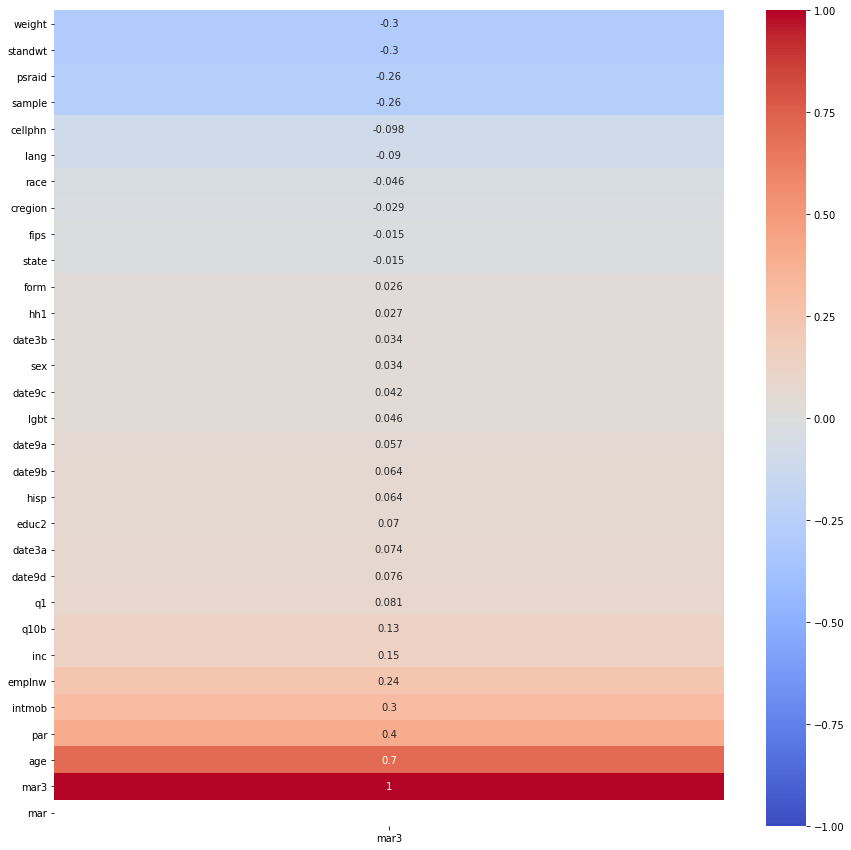

In [276]:
plt.figure(figsize=(15,15))
sns.heatmap(married.corr()[['mar3']].sort_values('mar3'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm');

### Avg Years of Marriage By Mobile Internet Access

In [277]:
internet_mob =married.groupby('intmob')['mar3'].mean()

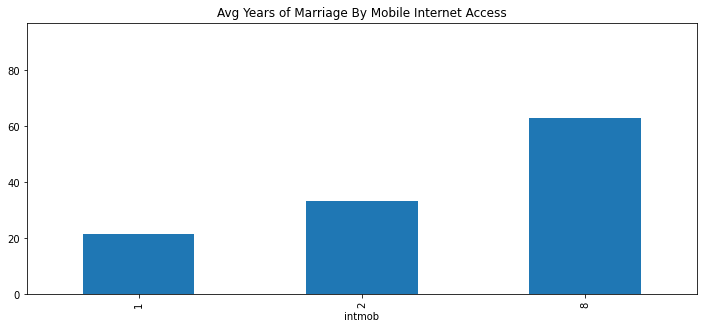

In [278]:
plt.figure(figsize = (12, 5))

ax = internet_mob.plot.bar(title='Avg Years of Marriage By Mobile Internet Access')
ax.set_ylim(0.0,97.0)
plt.savefig('rel_years_by_internet.png');

### Avg Years of Relationship By Mobile Internet Access for Couples Living Together

In [279]:
live_partner['mar3'] = pd.to_numeric(live_partner['mar3'])

<ipython-input-279-68b3e3bd3ab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_partner['mar3'] = pd.to_numeric(live_partner['mar3'])


In [280]:
internet_mob_live_p =live_partner.groupby('intmob')['mar3'].mean()
internet_mob_live_p

intmob
1     7.898734
2    13.076923
8    25.000000
Name: mar3, dtype: float64

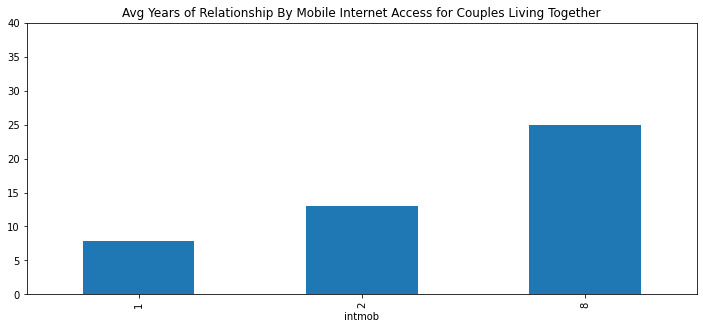

In [281]:
plt.figure(figsize = (12, 5))

ax = internet_mob_live_p.plot.bar(title='Avg Years of Relationship By Mobile Internet Access for Couples Living Together')
ax.set_ylim(0.0,40.0)
plt.savefig('rel_years_by_internet_live_p.png');

### Avg Years of Commited Relationship By Mobile Internet Access

In [282]:
committed['mar3'] = pd.to_numeric(committed['mar3'])

<ipython-input-282-4be09f254ce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  committed['mar3'] = pd.to_numeric(committed['mar3'])


In [283]:
internet_mob_c =committed.groupby('intmob')['mar3'].mean()
internet_mob_c

intmob
1     5.786982
2    10.702128
Name: mar3, dtype: float64

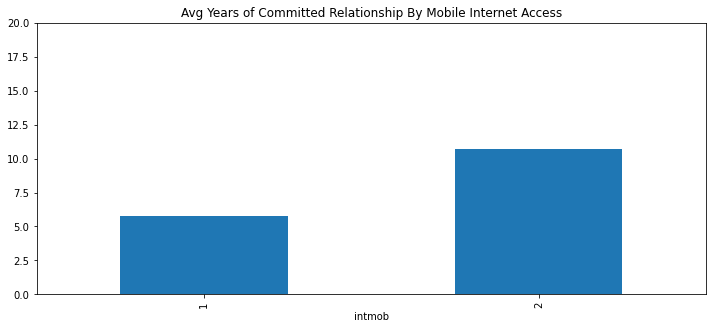

In [284]:
plt.figure(figsize = (12, 5))

ax = internet_mob_c.plot.bar(title='Avg Years of Committed Relationship By Mobile Internet Access')
ax.set_ylim(0.0,20.0)
plt.savefig('rel_years_by_internet_c.png');

### Predicting Years in a Relationship In Married Couples, Couples Living Together, and Couples in a Committed Relationship

In [285]:
df = pd.concat([married, live_partner, committed])

In [286]:
df.head()

,psraid,sample,lang,state,fips,cregion,usr,llitext,form,sex,q1,intuse,emlocc,eminuse,intmob,home3nw,q2,modem4b,q3,q4,q5,q6,q7,q9,act21,act87,act93,act112,act130,look1,look2,loc1a,loc1b,q10a,q10b,cellphn,smart1,smart2,q11a,q11b,q11c,q11d,q11e,q11f,q12,loc2a,loc2b,loc3m1,loc3m2,loc3m3,loc3m4,loc3m5,loc3m6,loc3m7,loc3m8,loc3m9,loc3m10,loc3m11,loc3m12,loc3m13,mar,mar2,mar3,mar4,meet,rel1,rel2,rel3,intdatea,intdateb,intdatec,intdated,intdatee,snsdate1a,snsdate1b,snsdate1c,snsdate1d,snsdate1e,snsdate2a,snsdate2b,snsdate2c,celldatea,celldateb,breaka,breakb,date1a,date1bm1,date1bm2,date1bm3,date1bm4,date1bm5,date1bm6,date1bm7,date1bm8,date1bm9,date1bm10,date1bm11,date1bm12,date1bm13,date1bm14,date1bm15,date1bm16,date1bm17,date2a,date2bm1,date2bm2,date2bm3,date2bm4,date2bm5,date2bm6,date2bm7,date2bm8,date2bm9,date2bm10,date2bm11,date2bm12,date2bm13,date2bm14,date2bm15,date2bm16,date3a,date3b,date4a,date4b,date4c,date5a,date5b,date5c,date5d,date5e,date5f,date6,date7,date8a,date8b,date8c,date8d,date8e,date9a,date9b,date9c,date9d,rel4a,rel4b,rel4c,rel5,rel6,rel7,rel8a,rel8b,rel8c,rel8d,rel8e,rel8f,q13a,q13b,q13c,age,par,qd2b1,qd2b2,qd2c,hh1,educ2,emplnw,hisp,birth_hisp,race,inc,lgbt,ql1a,ql2hh,qc1,qc2hh,q2os,modem4bos,q6os,smart2os,loc3os,rel3vb,date1bos,date2bos,raceos,weight,standwt
0,100006,1,1,5,5109,3,R,2,1,2,2,1,1,,2,1,,98,,,,,,,2,2,2,2,2,2,2,,,1,1,1,2,7,2,2,2,2,2,2,,2,2,,,,,,,,,,,,,,1,,57,,,2,,,2,2,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,,,,,,,,,,,,,,,,,1,1,2,2,2,,1,1,3,,2,2,2,,2,2,2,2,2,77,2,,,,2,8,3,2,,1,5,1,,3,,,,,,,,,,,,1.258065,0.397268
1,100017,1,1,17,17031,2,S,2,1,2,2,1,1,,1,1,,4,,,,,,,1,1,2,2,2,1,2,2,,1,2,1,1,1,1,1,1,2,1,1,2,2,1,,,,,,,,,,,,,,1,,15,,,2,,,2,2,,,,2,1,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,1,2,,,,,,,,,,,,,,,,,2,1,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2,2,2,38,1,0,1,1,2,6,2,2,,1,9,1,,2,,,,,,,,,,,,2.354839,0.743604
2,100025,1,1,34,34039,1,S,2,2,1,3,,,1,1,1,,5,,,,,,,1,2,2,2,2,1,2,,,1,2,1,1,3,1,1,1,2,1,1,1,2,1,,,,,,,,,,,,,,1,,15,,,2,,,1,2,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,1,1,,,,,,,,,,,,,,,,,1,2,2,1,1,,2,1,1,1,2,2,1,2,2,2,2,2,2,51,1,1,2,0,2,4,1,2,,4,8,1,,1,,,,,,,,,,,,6.870968,2.169695
4,100028,1,1,45,45091,3,U,2,2,2,3,,,1,2,1,,3,,,,,,,1,1,2,2,2,1,2,,2,1,2,1,2,7,2,2,2,2,2,1,,2,2,,,,,,,,,,,,,,1,,18,,,2,,,2,2,,,,2,2,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,,,,,,,,,,,,,,,,,2,2,1,2,1,2,2,1,3,,2,2,2,2,2,2,2,2,2,62,2,,,,2,6,3,2,,1,99,1,,2,,,,,,,,,,,,1.419355,0.448200
5,100031,1,1,19,19061,2,R,2,1,2,4,1,2,,2,1,,2,,,,,,,2,1,2,2,2,2,2,2,,1,2,1,2,8,2,2,2,2,2,1,,2,2,,,,,,,,,,,,,,1,,23,,,2,,,2,2,,,,2,2,,,,2,2,2,,,,,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,,,,,,,,,,,,,,,,,2,2,1,1,1,2,2,2,3,,2,2,2,2,2,2,2,2,2,48,1,0,0,3,2,5,1,2,,1,3,1,,2,,,,,,,,,,,,2.419355,0.763977


In [287]:
model_df = df[['mar3','rel1', 'intuse', 'emlocc', 'eminuse', 'intmob', 'act87', 'act112', 'act130', 'q10a', 'q10b', 'cellphn','smart1', 'q11b', 'q11c', 'q11d', 'q11f', 'rel2', 'intdateb', 'intdated', 'intdatee', 'snsdate1c', 'date1a', 'date2a']]
              

In [288]:
model_df.head()

,mar3,rel1,intuse,emlocc,eminuse,intmob,act87,act112,act130,q10a,q10b,cellphn,smart1,q11b,q11c,q11d,q11f,rel2,intdateb,intdated,intdatee,snsdate1c,date1a,date2a
0,57,2,1,1,,2,2,2,2,1,1,1,2,2,2,2,2,,2,,,,2,
1,15,2,1,1,,1,1,2,2,1,2,1,1,1,1,2,1,,2,,,,2,2
2,15,2,,,1,1,2,2,2,1,2,1,1,1,1,2,1,,2,,,,2,2
4,18,2,,,1,2,1,2,2,1,2,1,2,2,2,2,1,,2,,,,2,
5,23,2,1,2,,2,1,2,2,1,2,1,2,2,2,2,1,,2,,,,2,


In [289]:
model_df.shape

(1428, 24)

### Data Cleaning

In [290]:
columns = model_df.columns

In [291]:
model_df[columns] = model_df[columns].apply(pd.to_numeric, errors='coerce')

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [292]:
model_df.head()

,mar3,rel1,intuse,emlocc,eminuse,intmob,act87,act112,act130,q10a,q10b,cellphn,smart1,q11b,q11c,q11d,q11f,rel2,intdateb,intdated,intdatee,snsdate1c,date1a,date2a
0,57,2,1.0,1.0,NaN,2,2.0,2.0,2.0,1.0,1,1,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN
1,15,2,1.0,1.0,NaN,1,1.0,2.0,2.0,1.0,2,1,1.0,1.0,1.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0
2,15,2,NaN,NaN,1.0,1,2.0,2.0,2.0,1.0,2,1,1.0,1.0,1.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0
4,18,2,NaN,NaN,1.0,2,1.0,2.0,2.0,1.0,2,1,2.0,2.0,2.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN
5,23,2,1.0,2.0,NaN,2,1.0,2.0,2.0,1.0,2,1,2.0,2.0,2.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN


### Imputing and Handling Nulls

In [293]:
model_df.isnull().sum()

mar3            0
rel1            0
intuse        717
emlocc        717
eminuse       711
intmob          0
act87         160
act112        160
act130        160
q10a          724
q10b            0
cellphn         0
smart1         69
q11b           69
q11c           69
q11d           69
q11f           69
rel2         1365
intdateb      160
intdated      934
intdatee      934
snsdate1c    1029
date1a        160
date2a        779
dtype: int64

In [294]:
model_df['cellphn'].value_counts()

1    1359
0      69
Name: cellphn, dtype: int64

In [295]:
#Drop q10a
model_df['q10a'].value_counts()

1.0    635
2.0     69
Name: q10a, dtype: int64

In [296]:
# Drop eminuse, emlocc, and intuse
model_df['eminuse'].value_counts()

1.0    611
2.0    106
Name: eminuse, dtype: int64

In [297]:
# Impute 2 = no internet for act87, act112, act130,  Drop refused
model_df['act87'] = model_df['act87'].fillna(2)
model_df.drop(model_df[model_df['act87'] == 9].index, inplace = True) 
print(model_df['act87'].value_counts())

1.0    877
2.0    548
Name: act87, dtype: int64


<ipython-input-297-d679cef46440>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['act87'] = model_df['act87'].fillna(2)
/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [298]:
model_df['act112'] = model_df['act112'].fillna(2)
model_df.drop(model_df[model_df['act112'] == 9].index, inplace = True)
print(model_df['act112'].value_counts())

2.0    1239
1.0     186
Name: act112, dtype: int64


<ipython-input-298-45a82939fa71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['act112'] = model_df['act112'].fillna(2)


In [299]:
model_df['act130'] = model_df['act130'].fillna(2)
model_df.drop(model_df[model_df['act130'] == 8].index, inplace = True)
model_df.drop(model_df[model_df['act130'] == 9].index, inplace = True)
print(model_df['act130'].value_counts())

2.0    1317
1.0      64
Name: act130, dtype: int64


<ipython-input-299-ba6e847e243c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['act130'] = model_df['act130'].fillna(2)


In [300]:
# Drop
model_df['smart1'].value_counts()

1.0    722
2.0    542
8.0     50
Name: smart1, dtype: int64

In [301]:
# impute 2 = no cell phone for q11b, qllc, qlld, q11f
model_df['q11b'] = model_df['q11b'].fillna(2)
model_df.drop(model_df[model_df['q11b'] == 8].index, inplace = True)
model_df['q11b'].value_counts()

<ipython-input-301-1217cc1d29a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['q11b'] = model_df['q11b'].fillna(2)


2.0    751
1.0    628
Name: q11b, dtype: int64

In [302]:
model_df['q11c'] = model_df['q11c'].fillna(2)
model_df['q11c'].value_counts()

<ipython-input-302-13b523ddbc37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['q11c'] = model_df['q11c'].fillna(2)


1.0    753
2.0    626
Name: q11c, dtype: int64

In [303]:
model_df['q11d'] = model_df['q11d'].fillna(2)
model_df.drop(model_df[model_df['q11d'] == 8].index, inplace = True)
model_df['q11d'].value_counts()

<ipython-input-303-2d404603dc88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['q11d'] = model_df['q11d'].fillna(2)


2.0    1130
1.0     248
Name: q11d, dtype: int64

In [304]:
model_df['q11f'] = model_df['q11f'].fillna(2)
model_df.drop(model_df[model_df['q11f'] == 9].index, inplace = True)
model_df['q11f'].value_counts()

<ipython-input-304-a6ae71e08061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['q11f'] = model_df['q11f'].fillna(2)


1.0    1027
2.0     350
Name: q11f, dtype: int64

In [305]:
# Impute 0 for missing
# Drop refused
model_df['rel2'] = model_df['rel2'].fillna(0)
model_df.drop(model_df[model_df['rel2'] == 9].index, inplace = True)
model_df['rel2'].value_counts()

<ipython-input-305-ad60feb49302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['rel2'] = model_df['rel2'].fillna(0)


0.0    1316
1.0      37
2.0      23
Name: rel2, dtype: int64

In [306]:
# Drop don't know and refused
# Impute missing as 2
model_df['date1a'] = model_df['date1a'].fillna(2)
model_df.drop(model_df[model_df['date1a'] == 8].index, inplace = True)
model_df.drop(model_df[model_df['date1a'] == 9].index, inplace = True)
model_df['date1a'].value_counts()

<ipython-input-306-20ce5df4cf51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['date1a'] = model_df['date1a'].fillna(2)


2.0    1290
1.0      83
Name: date1a, dtype: int64

In [307]:
# Impute 2 for missing and drop don't know
model_df['date2a'] = model_df['date2a'].fillna(2)
model_df.drop(model_df[model_df['date2a'] == 8].index, inplace = True)
model_df['date2a'].value_counts()

<ipython-input-307-7501f7a3c0f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['date2a'] = model_df['date2a'].fillna(2)


2.0    1351
1.0      22
Name: date2a, dtype: int64

In [322]:
# Drop refused
model_df.drop(model_df[model_df['mar3'] == 99].index, inplace = True)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [308]:
model_df.drop(columns=['q10a', 'intdateb', 'intdated', 'intdatee', 'snsdate1c', 'emlocc', 'intuse', 'eminuse', 'smart1'], inplace=True)



In [323]:
model_df.shape

(1359, 15)

In [310]:
model_df.head()

,mar3,rel1,intmob,act87,act112,act130,q10b,cellphn,q11b,q11c,q11d,q11f,rel2,date1a,date2a
0,57,2,2,2.0,2.0,2.0,1,1,2.0,2.0,2.0,2.0,0.0,2.0,2.0
1,15,2,1,1.0,2.0,2.0,2,1,1.0,1.0,2.0,1.0,0.0,2.0,2.0
2,15,2,1,2.0,2.0,2.0,2,1,1.0,1.0,2.0,1.0,0.0,2.0,2.0
4,18,2,2,1.0,2.0,2.0,2,1,2.0,2.0,2.0,1.0,0.0,2.0,2.0
5,23,2,2,1.0,2.0,2.0,2,1,2.0,2.0,2.0,1.0,0.0,2.0,2.0


In [311]:
model_df.isnull().sum()

mar3       0
rel1       0
intmob     0
act87      0
act112     0
act130     0
q10b       0
cellphn    0
q11b       0
q11c       0
q11d       0
q11f       0
rel2       0
date1a     0
date2a     0
dtype: int64

### EDA Graphs

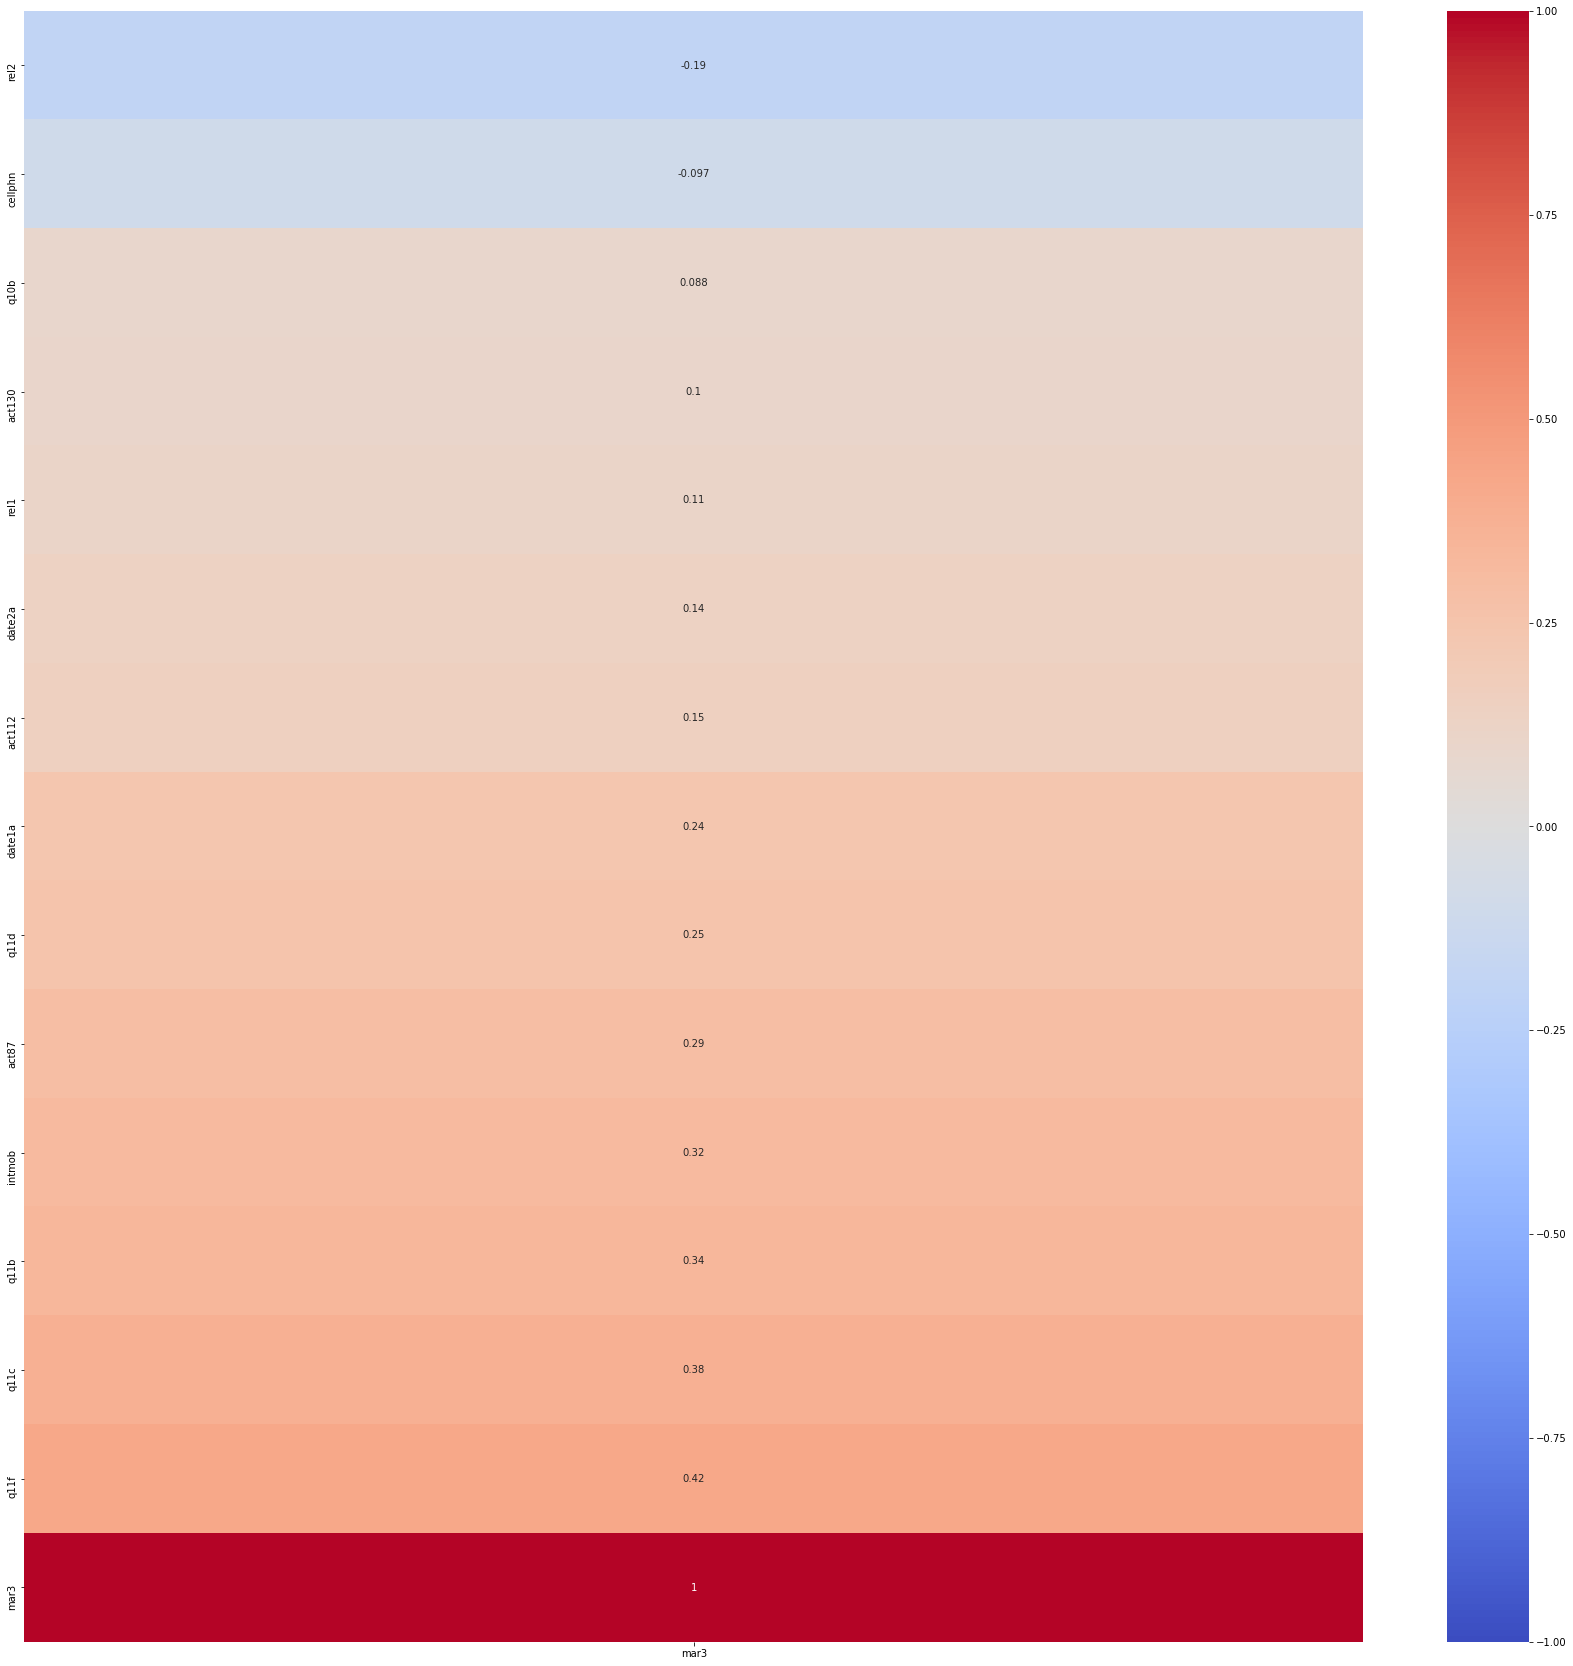

In [324]:
plt.figure(figsize=(30,30))
sns.heatmap(model_df.corr()[['mar3']].sort_values('mar3'),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

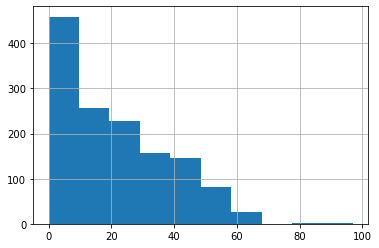

In [325]:
model_df['mar3'].hist();

### Preparing Model

In [340]:
X = model_df.drop(columns = ['mar3'])
y = model_df['mar3']

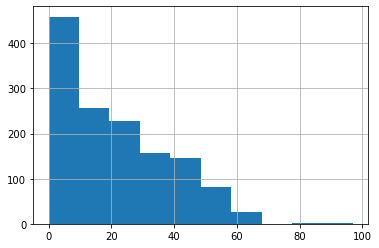

In [344]:
# Check histogram of sqrt-years
y.hist();

### Train Test Split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Instantiate Model and Score

In [342]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [343]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.2820457820729101, 0.25776479237543604)

In [346]:
list(zip(X_train.columns, lr.coef_))

[('rel1', 0.001696348037610942),
 ('intmob', 1.4431146263941061),
 ('act87', 3.8582371256373285),
 ('act112', -0.2602626522002323),
 ('act130', 2.934361969860344),
 ('q10b', -1.1974061655915333),
 ('cellphn', 6.804244529471954),
 ('q11b', 1.3650087555406998),
 ('q11c', 2.443634313929963),
 ('q11d', 3.1229913989363367),
 ('q11f', 11.907740054758507),
 ('rel2', -4.914830222266495),
 ('date1a', 11.532913964138787),
 ('date2a', 4.89882076252189)]

In [347]:
preds = lr.predict(X_test)

In [348]:
preds

array([18.26944271, 13.90022317, -2.38161478, 18.00416875, 19.68404552,
       18.63393178, 17.02321456, 17.02321456, 38.04094944, 21.07756609,
       36.84354328, 24.93580322, 24.93580322, 30.03929875, 21.75573279,
       17.02321456, 19.68404552, 24.93580322, 31.54219152, 22.27497226,
       30.04947683, 15.8258084 , 29.79359028, 10.92698764, 33.2455688 ,
       23.49268859, 15.8258084 , 22.27497226, 17.02321456, 18.64848597,
       24.69009476, 32.98530615, 30.03929875, 26.13320939, 36.84354328,
       13.40288926, 32.73959769, 14.16048582, 12.702817  , 32.75147213,
        7.35946036, 20.83185763, 22.00144125, 36.84354328, 17.02321456,
       17.28347722, 19.46684888, 21.07756609, 36.84354328, 17.02321456,
       10.9658612 , 35.40042865, 21.07756609, 24.93580322, 18.38822332,
       21.12716015, 18.38822332, 14.16048582, 16.56105413, 20.88145169,
       21.04905428, 32.98530615, 28.59618412, 12.89144643, 11.22612385,
       16.56105413, 17.02321456, 18.38822332, 32.73959769, 17.28

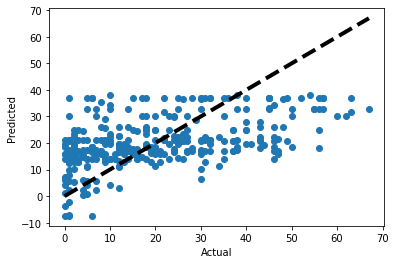

In [362]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.savefig('actual_pred.png');

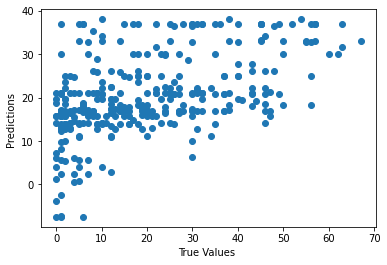

In [359]:
plt.scatter(y_test, preds)
plt.xlabel('True Values ')
plt.ylabel('Predictions ');